In [13]:
import rosbag
import numpy as np
from nav_msgs.msg import Odometry  
import matplotlib.pyplot as plt
import math
from tf import transformations
import time
from datetime import datetime

In [14]:
x_odom = []
y_odom = []
z_odom = []
x_odom_q = []
y_odom_q= []
z_odom_q = []
w_odom_q = []
quat_odom = []
yaw_odom = []
timestamps_odom=[]
timestamp_odom =[]

x_fil = []
y_fil = []
z_fil = []
x_fil_q = []
y_fil_q= []
z_fil_q = []
w_fil_q = []
quat_fil = []
yaw_fil = []
timestamps=[]
timestamp =[]

x_marv = []
y_marv = []
z_marv = []
x_marv_q = []
y_marv_q= []
z_marv_q = []
w_marv_q = []
quat_marv = []
yaw_marv = []
timestamps_marv =[]
timestamp_marv =[]

x_2 = []
y_2 = []
z_2 = []
x_1 = []
y_1 = []
z_1 = []

x_mean = []
y_mean = []
z_mean = []


In [15]:
bag = rosbag.Bag ('/home/ros/catkin_ws_yassin/src/match/my_scripts/aufnahmen/aufnahmen_test_marvelmind/stationary_state/aufnahme_stationary_los/2022-11-07-14-07-53.bag')
for topic, msg, t in bag.read_messages(topics=['/odom']):
    x_odom.append(msg.pose.pose.position.x)
    y_odom.append(msg.pose.pose.position.y)
    z_odom.append(msg.pose.pose.position.z)
    x_odom_q.append(msg.pose.pose.orientation.x)
    y_odom_q.append(msg.pose.pose.orientation.y)
    z_odom_q.append(msg.pose.pose.orientation.z)
    w_odom_q.append(msg.pose.pose.orientation.w)
    timestamps_odom.append(msg.header.stamp)
for topic, msg, t in bag.read_messages(topics=['/odometry/filtered']):
    x_fil.append(msg.pose.pose.position.x)
    y_fil.append(msg.pose.pose.position.y)
    z_fil.append(msg.pose.pose.position.z)
    x_fil_q.append(msg.pose.pose.orientation.x)
    y_fil_q.append(msg.pose.pose.orientation.y)
    z_fil_q.append(msg.pose.pose.orientation.z)
    w_fil_q.append(msg.pose.pose.orientation.w)
    timestamps.append(msg.header.stamp)
for topic, msg, t in bag.read_messages(topics=['/position_marvelmind_with_covariance']):
    x_marv.append(msg.pose.pose.position.x)
    y_marv.append(msg.pose.pose.position.y)
    z_marv.append(msg.pose.pose.position.z)  
    x_marv_q.append(msg.pose.pose.orientation.x)
    y_marv_q.append(msg.pose.pose.orientation.y)
    z_marv_q.append(msg.pose.pose.orientation.z)
    w_marv_q.append(msg.pose.pose.orientation.w)
    timestamps_marv.append(msg.header.stamp)
for topic, msg, t in bag.read_messages(topics=['/hedge2/hedge_pos_ang']):
    x_2.append(msg.x_m)
    y_2.append(msg.y_m)
    z_2.append(msg.z_m)   
for topic, msg, t in bag.read_messages(topics=['/hedge1/hedge_pos_ang']):
    x_1.append(msg.x_m)
    y_1.append(msg.y_m)
    z_1.append(msg.z_m)   
for topic, msg, t in bag.read_messages(topics=['/position_mean']):
    x_mean.append(msg.pose.pose.position.x)
    y_mean.append(msg.pose.pose.position.y)
    z_mean.append(msg.pose.pose.position.z) 
bag.close() 

#%matplotlib


In [ ]:
from os import times


l = len(x_fil_q)
for i in range (l):
    quat_fil=[x_fil_q[i],y_fil_q[i],z_fil_q[i],w_fil_q[i]]
    euler_fil = transformations.euler_from_quaternion (quat_fil)
    yaw_fil.append(euler_fil [2])
    yaw_fil_unwraped=np.unwrap(yaw_fil)
    deg_fil_unwraped=((yaw_fil_unwraped/(math.pi))*180)
    tt=str((timestamps[i]-timestamps[0])/10000)
    timestamp.append(tt)
    result_1 = [int(item) for item in timestamp]
    
#plt.plot(euler_2)
plt.plot(result_1, deg_fil_unwraped)


f = len(x_odom_q)
for i in range (f):
    quat_odom=[x_odom_q[i],y_odom_q[i],z_odom_q[i],w_odom_q[i]]
    euler_odom = transformations.euler_from_quaternion (quat_odom)
    yaw_odom.append(euler_odom[2])
    yaw_odom_unwraped=np.unwrap(yaw_odom)
    deg_odom_unwraped=((yaw_odom_unwraped/(math.pi))*180)  
    tt_odom=str((timestamps_odom[i]-timestamps_odom[0])/10000)
    timestamp_odom.append(tt_odom)
    result = [int(item) for item in timestamp_odom]

plt.plot(result,deg_odom_unwraped)
#print (yaw_odom)

f = len(x_marv_q)
for i in range (f):
    quat_marv=[x_marv_q[i],y_marv_q[i],z_marv_q[i],w_marv_q[i]]
    euler_marv = transformations.euler_from_quaternion (quat_marv)
    yaw_marv.append(euler_marv[2])
    yaw_marv_unwraped=np.unwrap(yaw_marv)
    degz_marv_unwraped=((yaw_marv_unwraped/(math.pi))*180)
    tt_marv=str((timestamps_marv[i]-timestamps_marv[0])/10000)
    timestamp_marv.append(tt_marv)
    result_2 = [int(item) for item in timestamp_marv] 


plt.plot(result_2,degz_marv_unwraped)



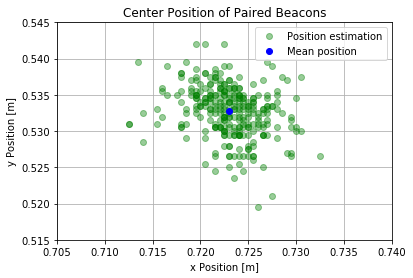

max error for beacon1 in x direction =  0.031000000000000028
max error for beacon1 in y direction =  0.02999999999999997
max error for beacon2 in x direction =  0.02400000000000002
max error for beacon2 in y direction =  0.02100000000000002
max error for paired beacons in x direction =  0.020000000000000018
max error for paired beacons in y direction =  0.022500000000000075


In [72]:
#plot5=plt.plot(x_1,y_1,'bo',alpha=0.2,label='Beacon Position')
#plot6=plt.plot(x_2,y_2,'ro',alpha=0.2,label='Beacon Position 2')
plot7=plt.plot(x_mean,y_mean,'go',alpha=0.4,label='Position estimation')
plot7=plt.plot(np.mean (x_mean) , np.mean (y_mean),'bo',label='Mean position ')
plt.legend(loc="upper right")
plt.xlabel("x Position [m]")
plt.ylabel("y Position [m]")
#plt.title("Single Beacons Position")
plt.title("Center Position of Paired Beacons")
plt.xlim([0.705, 0.74])
plt.ylim([0.515, 0.545])
plt.grid(True)
#plt.scatter( np.mean (x_mean) , np.mean (y_mean), s=14400 ,  facecolors='none', edgecolors='blue' ) 
plt.show()


mx_1=np.max(x_1)-np.min(x_1)
#smx_1=np.std(x_1)
my_1=np.max(y_1)-np.min(y_1)
print ('max error for beacon1 in x direction = ',mx_1)
print ('max error for beacon1 in y direction = ',my_1)
#print (smx_1)
#circle1 = plt.Circle(np.mean (mx_1), (np.mean (my_1)), 0.01, color='b', fill=False)

mx_2=np.max(x_2)-np.min(x_2)
#smx_2=np.std(x_2)
my_2=np.max(y_2)-np.min(y_2)
print ('max error for beacon2 in x direction = ',mx_2)
print ('max error for beacon2 in y direction = ',my_2)
#print (smx_2)
#circle2 = plt.Circle(np.mean (mx_2), (np.mean (my_2)), 0.01, color='b', fill=False)

mx_mean=np.max(x_mean)-np.min(x_mean)
#smx_mean=np.std(x_mean)
my_mean=np.max(y_mean)-np.min(y_mean)
print ('max error for paired beacons in x direction = ',mx_mean)
print ('max error for paired beacons in y direction = ',my_mean)
#print (smx_mean)

plt.show()

In [ ]:
plot1=plt.plot(x_odom,y_odom,'-b',label='Odometry')
plot2=plt.plot(x_fil,y_fil,'-k',label='Data fusion')
plot3=plt.plot(x_marv,y_marv,'-r',label='Marvelmind')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()